In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os

%matplotlib inline
import numpy as np
import glob
from pprint import pprint
import ctypes

physical_device = tf.config.experimental.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_device[0], True)


#做自定义数据集

#得到图像的路径image_path和对应的标签labels
image_path = glob.glob("/root/images/ED1/*/*.JPG") # 把图像路径都获取到
print(len(image_path))
# pprint(image_path[:3]) # 前3张
# pprint(image_path[-3:])# 后3张

# np.random.seed(123)
# np.random.shuffle(image_path)# 对image_path进行乱序
# pprint(image_path[:3]) # 前3张
# pprint(image_path[-3:])# 后3张

labels = [path.split("/")[-2] for path in image_path] 
#labels = [path.split("\\")[1] for path in image_path] #提取出所有的label
# pprint(labels)

# 用0、1、2分别代表三种类型
np.unique(labels) # 用np.unique取出一共有多少分类

#变成字典
name_to_index = dict((name, i) for i,name in enumerate(np.unique(labels)))#给一个类别名,得到对应的数字标签
# print(name_to_index)

index_to_name = dict((i, name) for i,name in enumerate(np.unique(labels)))#给一个数字标签,得到对应的类别名
print(index_to_name)

labels = [name_to_index.get(name) for name in labels]
# pprint(labels)

# 创建dataset之前把image_path转换成ndarray
image_path = np.array(image_path) # 图片路径的ndarray
labels = np.array(labels) # labels的ndarray
# print(image_path)
# print("labels:",labels)

#做dataset
# 给一个路径然后调用函数加载图像, 并对图像做预处理(就是你看把dataset封装成一个图像路径的数据集, 然后对路径数据集中的每一项调用map这个函数,或者说做这样一个函数映射，就可以得到图像的数据集)
# def load_images(path):
#     img = tf.io.read_file(path) # 读取路径下的文件
#     img = tf.image.decode_jpeg(img) # 对读取到的图像解码之后就是正常的图像了
#     img = tf.image.resize(img, (80,80)) # 把图像resize到80*80
#     img = tf.image.random_crop(img, [64, 64, 3]) # 把图像随机裁剪成64*64
#     img = tf.image.random_flip_left_right(img) # 把图像左右翻转
#     img = img / 127.5 - 1
    # return img
def load_images(path):
    img = tf.io.read_file(path) # 读取路径下的文件
    img = tf.image.decode_jpeg(img) # 对读取到的图像解码之后就是正常的图像了
    img = tf.image.resize(img, (150,150)) # 把图像resize到80*80
    img = tf.image.random_crop(img, [128, 128, 3]) # 把图像随机裁剪成64*64
    # img = tf.image.random_flip_left_right(img) # 把图像左右翻转
    img = img / 127.5 - 1
    return img

dataset_image_path = tf.data.Dataset.from_tensor_slices(image_path)
dataset_image = dataset_image_path.map(load_images)
# pprint(dataset_image)

# 标签的数据集
labels = np.array(labels)
dataset_labels = tf.data.Dataset.from_tensor_slices(labels)
# 图像+标签的数据集
dataset = tf.data.Dataset.zip((dataset_image, dataset_labels)) #((64, 64, 3),())

batch_size = 64
noise_dim = 100
images_num = len(image_path)
class_num = len(name_to_index) # 类别的个数

AUTOTUNE = tf.data.AUTOTUNE
dataset = dataset.shuffle(200).batch(batch_size).prefetch(AUTOTUNE) # 前面做了乱序了，现在只做小范围内的shuffle就行
# dataset = dataset.shuffle(200).batch(batch_size)
print(dataset)

2023-05-21 23:55:14.805236: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-21 23:55:15.884150: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-05-21 23:55:15.981597: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:57:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-21 23:55:15.981620: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-21 23:55:15.984317: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-21 23:55:15.984363: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcu

3000
{0: 'Crown_and_Root_Rot', 1: 'healthy', 2: 'stripe_rust'}
<PrefetchDataset shapes: ((None, 128, 128, 3), (None,)), types: (tf.float32, tf.int64)>


2023-05-21 23:55:15.999512: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 23:55:16.005322: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:57:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-21 23:55:16.005945: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-05-21 23:55:16.005978: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-05-21 23:55:16.443410: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interco

In [2]:
# 查看GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15915923916472678150
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 23392616448
locality {
  bus_id: 1
  links {
  }
}
incarnation: 15436785808875663201
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:57:00.0, compute capability: 8.6"
]


2023-05-21 23:55:16.527574: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:57:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2023-05-21 23:55:16.528181: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0
2023-05-21 23:55:16.528202: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-05-21 23:55:16.528205: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2023-05-21 23:55:16.528208: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2023-05-21 23:55:16.528807: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1418] Created TensorFlow device (/device:GPU:0 with 22308 MB memory) -> physical GPU (device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:57:00.0, compute capability: 8.6)


In [3]:
# # 生成器
# def generator_model():
#     noise = tf.keras.layers.Input(shape=((noise_dim,))) # 输入的噪声是100维
#     label = tf.keras.layers.Input(shape=(())) # 输入的标签就是1个数，但是这个数可以表示有3个类别，所以在下面Embedding第一个是3,第二个是50是映射成50个神经元
    
#     x = tf.keras.layers.Embedding(3, 50, input_length=1)(label) # 把一个长度是1的标签(没有有one-hot编码)
    
#     # 把x和noise合并在一起变成长度为150的向量，并希望最终得到一个(64,64,3)的图像
#     x = tf.keras.layers.concatenate([noise, x])
    
#     x = tf.keras.layers.Dense(4*4*64*8, use_bias=False)(x)
    
#     x = tf.keras.layers.Reshape((4, 4, 64*8))(x) # 注意reshape大写R # 现在形状是(4,4,64*8)
#     x = tf.keras.layers.BatchNormalization()(x)
    
#     x = tf.keras.layers.ReLU()(x)

#     #下面开始反卷积: (4, 4, 64*8) -> (8, 8, 64*4) -> (16, 16, 64*2) -> (32, 32, 64) -> (64, 64, 3)
#     #(4, 4, 64*8) -> (8, 8, 64*4)
#     x = tf.keras.layers.Conv2DTranspose(64*4, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)
    
#     #(8, 8, 64*4) -> (16, 16, 64*2)
#     x = tf.keras.layers.Conv2DTranspose(64*2, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)
    
#     # (16, 16, 64*2) -> (32, 32, 64)
#     x = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)  
    
#     #(32, 32, 64) -> (64, 64, 3)
#     x = tf.keras.layers.Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.Activation('tanh')(x)

#     model = tf.keras.Model(inputs=[noise, label], outputs=x)
#     return model


# -------
# def generator_model():
#     noise = tf.keras.layers.Input(shape=((noise_dim,))) # 输入的噪声是100维
#     label = tf.keras.layers.Input(shape=(())) # 输入的标签就是1个数，但是这个数可以表示有3个类别，所以在下面Embedding第一个是3,第二个是50是映射成50个神经元
    
#     x = tf.keras.layers.Embedding(3, 50, input_length=1)(label) # 把一个长度是1的标签(没有有one-hot编码)
    
#     #把x和noise合并在一起变成长度为150的向量，并希望最终得到一个(64,64,3)的图像
#     x = tf.keras.layers.concatenate([noise, x])
    
#     x = tf.keras.layers.Dense(7*7*112*8, use_bias=False)(x)
    
#     x = tf.keras.layers.Reshape((7, 7, 112*8))(x) # 注意reshape大写R # 现在形状是(4,4,64*8)
#     x = tf.keras.layers.BatchNormalization()(x)
    
#     x = tf.keras.layers.ReLU()(x)

#     #下面开始反卷积: (4, 4, 64*8) -> (8, 8, 64*4) -> (16, 16, 64*2) -> (32, 32, 64) -> (64, 64, 3)
#     #(4, 4, 64*8) -> (8, 8, 64*4)
#     x = tf.keras.layers.Conv2DTranspose(112*4, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)
    
#     #(8, 8, 64*4) -> (16, 16, 64*2)
#     x = tf.keras.layers.Conv2DTranspose(112*2, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)
    
#     # (16, 16, 64*2) -> (32, 32, 64)
#     x = tf.keras.layers.Conv2DTranspose(112, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.ReLU()(x)  
    
#     #(32, 32, 64) -> (64, 64, 3)
#     x = tf.keras.layers.Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
#     x = tf.keras.layers.Activation('tanh')(x)

#     model = tf.keras.Model(inputs=[noise, label], outputs=x)
#     return model


# 生成器 128* 128 * 3
def generator_model():
    noise = tf.keras.layers.Input(shape=((noise_dim,))) # 输入的噪声是100维
    label = tf.keras.layers.Input(shape=(())) # 输入的标签就是1个数，但是这个数可以表示有3个类别，所以在下面Embedding第一个是3,第二个是50是映射成50个神经元
    
    x = tf.keras.layers.Embedding(3, 50, input_length=1)(label) # 把一个长度是1的标签(没有有one-hot编码)
    
    # 把x和noise合并在一起变成长度为150的向量，并希望最终得到一个(128,128,3)的图像
    x = tf.keras.layers.concatenate([noise, x])
    
    x = tf.keras.layers.Dense(8*8*64*8, use_bias=False)(x)
    
    x = tf.keras.layers.Reshape((8, 8, 64*8))(x) # 注意reshape大写R # 现在形状是(8,8,64*8)
    x = tf.keras.layers.BatchNormalization()(x)
    
    x = tf.keras.layers.ReLU()(x)

    #下面开始反卷积: (8, 8, 64*8) -> (16, 16, 64*4) -> (32, 32, 64*2) -> (64, 64, 64) -> (128, 128, 3)
    #(8, 8, 64*8) -> (16, 16, 64*4)
    x = tf.keras.layers.Conv2DTranspose(64*4, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    #(16, 16, 64*4) -> (32, 32, 64*2)
    x = tf.keras.layers.Conv2DTranspose(64*2, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    # (32, 32, 64*2) -> (64, 64, 64)
    x = tf.keras.layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)  
    
    #(64, 64, 64) -> (128, 128, 3)
    x = tf.keras.layers.Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', use_bias=False)(x)
    x = tf.keras.layers.Activation('tanh')(x)

    model = tf.keras.Model(inputs=[noise, label], outputs=x)
    return model


# 创建生成器模型
generator = generator_model()

print(generator.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50)           150         input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 150)          0           input_1[0][0]                    
                                                                 embedding[0][0]              

In [4]:
# # 判别器
# def discriminator_model():
#     image = tf.keras.layers.Input(shape=((64, 64, 3)))
    
#     x = tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2), padding='same', use_bias=False)(image) # (32, 32, 64)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)    
#     x = tf.keras.layers.Dropout(0.5)(x) #不要快速成为一个很厉害的判别器
    
#     x = tf.keras.layers.Conv2D(64*2, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (16, 16, 64*2)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)
    
#     x = tf.keras.layers.Conv2D(64*4, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (8, 8, 64*4)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)
    
#     x = tf.keras.layers.Conv2D(64*8, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (4, 4, 64*8)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)

#     x = tf.keras.layers.Flatten()(x)
    
#     S_out = tf.keras.layers.Dense(1)(x) #未激活的判断图像真假的输出
#     # C_out = tf.keras.layers.Dense(class_num)(x) #分类输出，一共3类
#     C_out = tf.keras.layers.Dense(3)(x)
    
#     model = tf.keras.Model(inputs=image, outputs=[S_out, C_out]) #多输出模型
#     return model

# def discriminator_model():
#     image = tf.keras.layers.Input(shape=(112, 112, 3))

#     x = tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2), padding='same', use_bias=False)(image) # (112, 112, 64)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)    
#     x = tf.keras.layers.Dropout(0.5)(x) # 不要快速成为一个很厉害的判别器

#     x = tf.keras.layers.Conv2D(64*2, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (56, 56, 64*2)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)

#     x = tf.keras.layers.Conv2D(64*4, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (28, 28, 64*4)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)

#     x = tf.keras.layers.Conv2D(64*8, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (14, 14, 64*8)
#     x = tf.keras.layers.BatchNormalization()(x)
#     x = tf.keras.layers.LeakyReLU()(x)
#     x = tf.keras.layers.Dropout(0.5)(x)

#     x = tf.keras.layers.Flatten()(x)

#     S_out = tf.keras.layers.Dense(1)(x) #未激活的判断图像真假的输出
#     # C_out = tf.keras.layers.Dense(class_num)(x) #分类输出，一共3类
#     C_out = tf.keras.layers.Dense(3)(x)

#     model = tf.keras.Model(inputs=image, outputs=[S_out, C_out]) #多输出模型
#     return model

# 判别器 INPUT：128*128*3
def discriminator_model():
    image = tf.keras.layers.Input(shape=((128, 128, 3)))
    
    x = tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2), padding='same', use_bias=False)(image) # (64, 64, 64)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)    
    x = tf.keras.layers.Dropout(0.5)(x) #不要快速成为一个很厉害的判别器
    
    x = tf.keras.layers.Conv2D(64*2, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (32, 32, 64*2)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Conv2D(64*4, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (16, 16, 64*4)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    
    x = tf.keras.layers.Conv2D(64*8, (3, 3), strides=(2,2), padding='same', use_bias=False)(x) # (8, 8, 64*8)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.LeakyReLU()(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.Flatten()(x)
    
    S_out = tf.keras.layers.Dense(1)(x) #未激活的判断图像真假的输出
    C_out = tf.keras.layers.Dense(3)(x) #分类输出，一共3类
    
    model = tf.keras.Model(inputs=image, outputs=[S_out, C_out]) #多输出模型
    return model


discriminator = discriminator_model()
print(discriminator.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 64, 64, 64)   1728        input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 64, 64, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 64)   0           batch_normalization_4[0][0]      
____________________________________________________________________________________________

In [5]:
#损失函数
# 真假损失
SLoss = tf.keras.losses.BinaryCrossentropy(from_logits=True)# 二分类交叉熵损失
# 增加一个分类损失
CLoss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# 优化器
# generator_optimizer = tf.keras.optimizers.Adam(1e-4)
# discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [6]:
# 去掉fake_C_out的判别器损失
def discrimitor_loss(real_S_out, real_C_out, fake_S_out, label): 
    real_loss = SLoss(tf.ones_like(real_S_out), real_S_out)
    real_class_loss = CLoss(label, real_C_out)
    fake_loss = SLoss(tf.zeros_like(fake_S_out), fake_S_out)
    
    return real_loss + real_class_loss + fake_loss

# 生成器的损失
def generator_loss(fake_S_out, fake_C_out, label):
    fake_loss = SLoss(tf.ones_like(fake_S_out), fake_S_out)
    fake_class_loss = CLoss(label, fake_C_out)
    return fake_loss + fake_class_loss  


In [7]:
dis_loss=tf.keras.metrics.Mean('dis_loss')                      #用dis_loss计算平均损失
real_acc=tf.keras.metrics.SparseCategoricalAccuracy('real_acc') #用real_acc计算真实的图像的平均准确率
fake_acc=tf.keras.metrics.SparseCategoricalAccuracy('fake_acc') #用fake_acc计算生成的图像的平均准确率

In [8]:
#对一个批次的训练函数
@tf.function
def train_step(image, label): # 接受一个批次的image和其对应的label，比如image是(64, 28, 28, 1)label是(64, 1)
    size = label.shape[0] # 这个size就是一个批次的大小, label的shape也是[batch_size, 1]的大小, 创建和label数量相同的噪声
    noise = tf.random.normal([size, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as dis_tape:
        gen_images = generator((noise, label), training=True)
        # fake_out = discriminator((gen_images, label), training=True) # 判别器的输入Model(inputs=image, outputs=[S_out, C_out])
        fake_S_out, fake_C_out = discriminator(gen_images, training=True) # 判别器的输入Model(inputs=image, outputs=[S_out, C_out])
        
        # real_out = discriminator((image, label), training=True)
        real_S_out, real_C_out = discriminator(image, training=True)
        
        disc_loss = discrimitor_loss(real_S_out, real_C_out, fake_S_out, label)
        # disc_loss_value = discrimitor_loss(real_S_out, real_C_out, fake_S_out, label)
        gen_loss = generator_loss(fake_S_out, fake_C_out, label)
        
    # 计算梯度
    gen_grad = gen_tape.gradient(gen_loss, generator.trainable_variables) # 生成器各参数的梯度
    dis_grad = dis_tape.gradient(disc_loss, discriminator.trainable_variables) # 判别器各参数的梯度
    
    generator_optimizer.apply_gradients(zip(gen_grad, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(dis_grad, discriminator.trainable_variables))
    
    dis_loss(disc_loss)
    real_acc(label,real_C_out)
    fake_acc(label,fake_C_out)
    
    return disc_loss


In [9]:
#绘图函数
nsample = 10
noise_seed = tf.random.normal([nsample, noise_dim]) # 生成10个100维的固定的随机数
label_seed = np.random.randint(0, class_num, size=(nsample,1)) # 再生成10个固定的随机标签，以上的目的是通过给定同样的标签和随机数看一下生成器性能的提升效果
print(label_seed.T) # 上面直接写size=(nsample)也可以,那就是1维向量

condition = [index_to_name.get(i) for i in label_seed.T[0]]
pprint(condition)

def plot_gen_image(model, noise, label): # model就是生成器的模型label就是CGAN的那个C: condition
    
    gen_image = model((noise, label), training=False) # gen_image.shape是(batch, 64, 64, 3)
    
    fig = plt.figure(figsize=(10, 1))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow((gen_image[i,:,:] + 1)/2)
        plt.title(condition[i])
        plt.axis('off')
    plt.show()
    

[[0 0 0 1 0 0 2 2 2 2]]
['Crown_and_Root_Rot',
 'Crown_and_Root_Rot',
 'Crown_and_Root_Rot',
 'healthy',
 'Crown_and_Root_Rot',
 'Crown_and_Root_Rot',
 'stripe_rust',
 'stripe_rust',
 'stripe_rust',
 'stripe_rust']


In [10]:
#训练函数
def train(dataset, epochs):
    
    previous_losses = [] # 用于记录损失的列表
    convergenceThreshold = 0.000000001 #收敛阈值
    


    
    for epoch in range(epochs):
        for images_batch, label_batch in dataset:
            disc_loss = train_step(images_batch, label_batch)
            # dis_loss=tf.keras.metrics.Mean('dis_loss')
        
        if epoch % 1 == 0:
            print(dis_loss.result().numpy(), '\t', end="") 
            
        previous_losses.append(dis_loss.result().numpy()) # 记录当前的损失
        
        
        # 判断模型是否收敛
        if len(previous_losses) > 2 and abs(previous_losses[-1] - previous_losses[-2]) < convergenceThreshold:
            print("Training stopped. Model has converged.")
            break
            
        if epoch % 50 == 0:
            print("Epoch:{},dis_loss:{},real_acc:{},fake_acc:{}".format(epoch,dis_loss.result(),real_acc.result(),fake_acc.result())) 
            
            generator.save_weights('./128generator_weights.h5')
            discriminator.save_weights('./128discriminator_weights.h5')

            plot_gen_image(generator, noise_seed, label_seed)
            dis_loss.reset_states()
            real_acc.reset_states()
            fake_acc.reset_states()  
        

2023-05-21 23:55:19.217350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-05-21 23:55:19.241234: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2000000000 Hz
2023-05-21 23:55:20.962152: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-05-21 23:55:21.517441: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2023-05-21 23:55:21.517497: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-21 23:55:21.517647: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-05-21 23:55:22.040010: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101


4.3696713 	Epoch:0,dis_loss:4.36967134475708,real_acc:0.6163333058357239,fake_acc:0.6356666684150696


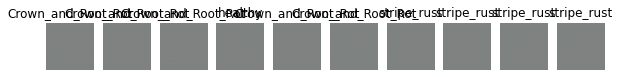

7.880473 	6.735323 	6.164669 	5.750332 	5.4595747 	5.2491717 	5.094029 	4.983586 	4.9524584 	4.974528 	5.0924664 	5.156238 	5.163581 	5.119139 	5.079268 	5.016286 	4.9466143 	4.8259444 	4.7304235 	4.6560802 	4.587774 	4.5165863 	4.478537 	4.409528 	4.350083 	4.295344 	4.240071 	4.1859603 	4.1397014 	4.0873523 	4.0560355 	4.028083 	3.9912062 	3.9465892 	3.9033883 	3.8434658 	3.7935033 	3.7360377 	3.6992779 	3.6707554 	3.6279845 	3.5983887 	3.5581574 	3.5126274 	3.4666734 	3.433918 	3.4011595 	3.3643427 	3.3333817 	3.2976832 	Epoch:50,dis_loss:3.2976832389831543,real_acc:0.5681533217430115,fake_acc:0.6467533111572266


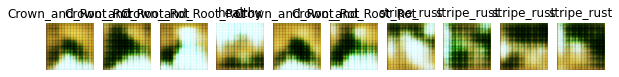

1.2461008 	1.256288 	1.232655 	1.4570398 	1.4975653 	1.4567208 	1.4104764 	1.3955644 	1.4138196 	1.4542494 	1.4689374 	1.4990857 	1.4994355 	1.5452262 	1.573636 	1.6008466 	1.6017225 	1.5959216 	1.5821737 	1.5751077 	1.5680772 	1.590286 	1.599979 	1.5990146 	1.5826683 	1.5658206 	1.5568224 	1.5365354 	1.5298408 	1.5124222 	1.5066404 	1.5087254 	1.5280328 	1.5377246 	1.5516646 	1.5642413 	1.5710586 	1.5641849 	1.5609581 	1.5458813 	1.539566 	1.5392604 	1.5342189 	1.5401485 	1.5426927 	1.5391599 	1.5362931 	1.533767 	1.5303507 	1.5207427 	Epoch:100,dis_loss:1.520742654800415,real_acc:0.8529199957847595,fake_acc:0.8634133338928223


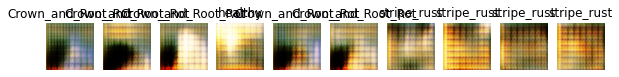

0.9245236 	0.94537085 	0.9147153 	0.8907828 	0.91352946 	0.918629 	0.92772067 	0.9961532 	1.0066617 	1.0420414 	1.0473653 	1.0471066 	1.0860206 	1.0914619 	1.1064657 	1.1057684 	1.129926 	

In [ ]:
epochs = 3000

if os.path.exists('./128generator_weights.h5') and os.path.exists('./128discriminator_weights.h5'):
    generator.load_weights('./128generator_weights.h5')
    discriminator.load_weights('./128discriminator_weights.h5')
    print("加载已存在的模型参数")
    
    
    
    
train(dataset, epochs) # ACGAN生成的图像边缘比较糊 
print("训练结束")


# 保存模型
print("保存模型")
#generator.compile(loss='binary_crossentropy', optimizer='adam') #损失和优化器之前定义过了，此处不用再来一次
#discriminator.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

generator.save('/root/Final128generator_model.h5')
discriminator.save('/root/Final128discriminator_model.h5')
print("保存结束")

In [1]:
# generator.summary()

In [ ]:
# 保存模型
print("保存模型")
#generator.compile(loss='binary_crossentropy', optimizer='adam') #损失和优化器之前定义过了，此处不用再来一次
#discriminator.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

generator.save('generator_model.h5')
discriminator.save('discriminator_model.h5')
print("保存结束")

In [ ]:
# #------------------模型评估-------------------
# def test(model, Label, weight_path):
    
#     model.load_weights(weight_path)
#     noise = np.random.normal(0, 1, (1, 100))
#     labels = Label
#     print(noise.shape)
#     print(labels.shape)

#     img = model.predict([noise, labels])
#     plt.imshow(img[0])
#     plt.show()

In [ ]:
def predict_label(model_path, image_path, index_to_name):
    '''
    model: 已经加载好的模型，目前只支持discriminator()
    image_path: 图片的绝对路径
    index_to_name: 下标->label的字典 eg:{0: 'healthy', 1: 'leaf_rust', 2: 'septoria'}
    '''
    img = load_images(image_path)
    img = tf.expand_dims(img, axis = 0) #添加一个维度，discriminator INPUT：shape=(None, 64, 64, 3)
    
    # print("image_shape:", img.shape)
    # out = discriminator_test(img)
    # print(out)
    
    discriminator = discriminator_model()
    discriminator.load_weights(model_path)
    # discriminator输出：[S_out, C_out]， S_out为真假， C_out为分类
    score = discriminator.predict(img)
    score = score[1]
    print(score)
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(index_to_name[np.argmax(score)], 100 * np.max(score))
    )

In [ ]:
# discriminator_path = '/root/model_weight/discriminator_model.h5'
# generator_path = '/root/model_weight/generator_model.h5'

# # https://www.tensorflow.org/tutorials/images/classification#predict_on_new_data
# image_path = '/root/train_decode_images/test/septoria/11.1200px-septoria-tritici.jpg' #测试发现对于healthy、leaf_rust判断的很准，但septoria却总被判断为leaf_rust
# img = load_images(image_path)
# img = tf.expand_dims(img, axis = 0)
# discriminator = discriminator_model().load_weights(discriminator_path)
# discriminator = discriminator_model()
# print(discriminator.summary())
# print(discriminator.predict(img))
# predict_label(discriminator_path, image_path, index_to_name)


import  os
discriminator_path = '/root/discriminator_model.h5'
generator_path = '/root/generator_model.h5'
test_image_path = '/root/images/train'

class_labels = []
for subdir in os.listdir(test_image_path):
        class_labels.append(subdir)
        

print(name_to_index)
print(index_to_name)

for class_label in class_labels:
    class_dir = test_image_path + '/' +  class_label + '/'
    print('----------' + class_label + '----------')
    
    count = [0,0,0]
    
    
    for img_file in os.listdir(class_dir):
        
        # 路径是文件夹则跳过
        if(os.path.isdir(img_file)):
            continue
            
        img_path = os.path.join(class_dir, img_file)
        img = load_images(img_path)
        img = tf.expand_dims(img, axis = 0) #添加一个维度，shape=(None, 64, 64, 3)
        pred = discriminator.predict(img)[1] # discriminator输出：[S_out, C_out]， S_out为真假， C_out为分类
        # print(pred)
        pred = np.argmax(pred)
        count[pred] += 1
        pred_class = index_to_name[pred]
        print(pred_class)
    
    sum = 0
    for i in range(len(count)):
        sum += count[i]

    print("LABEL:" + class_label)
    for i in range(len(count)):
        print(index_to_name[i] ,':\t' , count[i] , '\t' , count[i] / sum * 100)
    # print(count.index(max[count]))
    # print(count)
    
print("Over")